# Name:-
## Parth Suhas Mane

## Problem Statement
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset & check the shape of data..
df=pd.read_csv('Fraud_check.csv')
print(df.shape)
df.head()

(600, 6)


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA & Visualization

In [3]:
# Check information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


All columns data type are correctly identified

In [4]:
#check duplicated values
df.duplicated().sum()

0

There are no duplicate rows

In [5]:
#check correlation
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

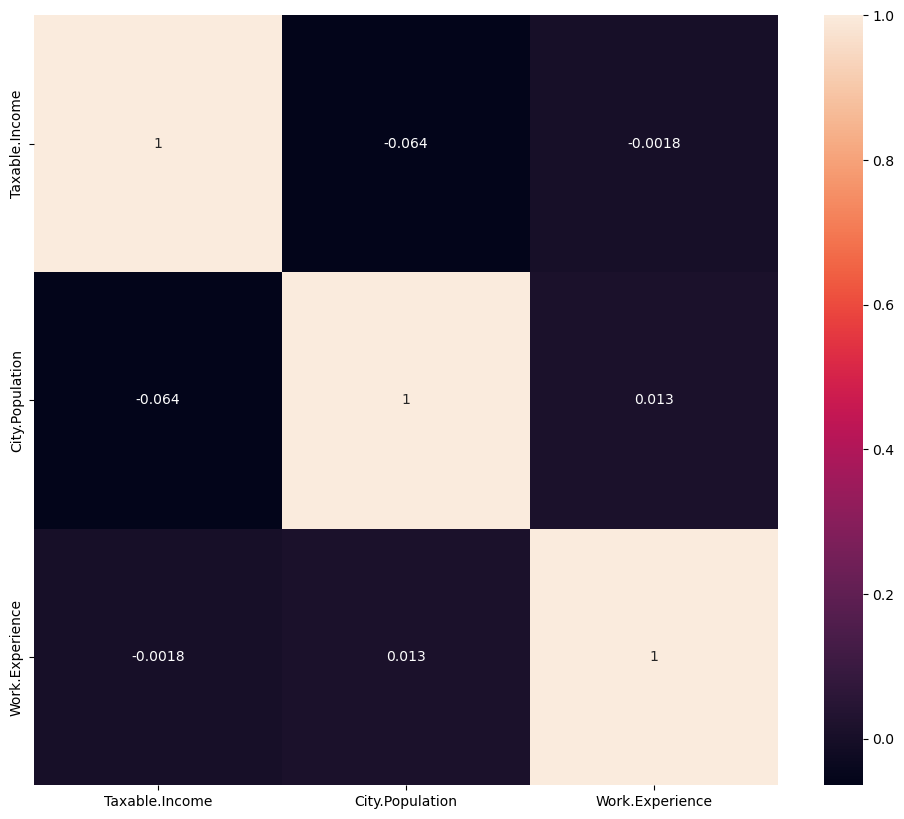

In [6]:
#Plot heatmap to see rectangular data as a color-encoded matrix.
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

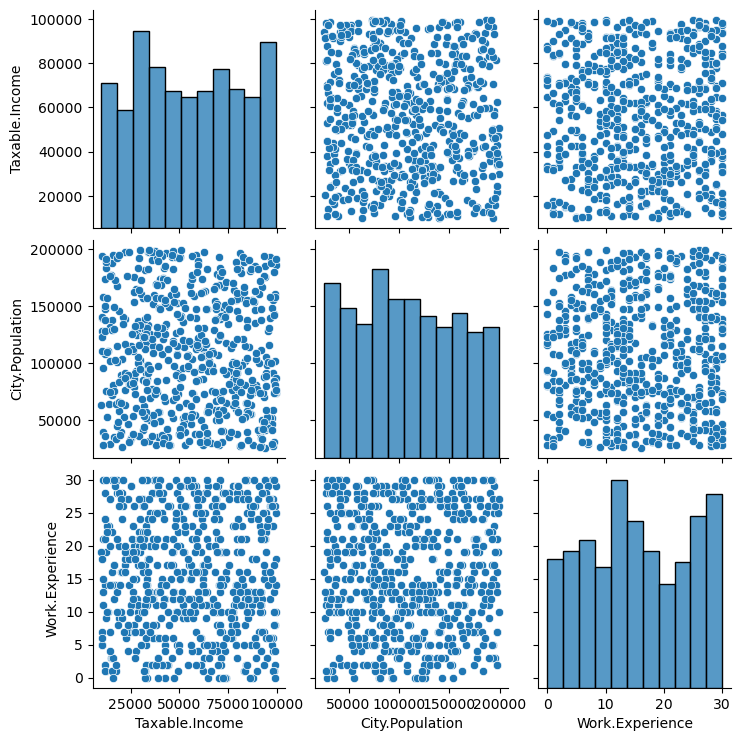

In [7]:
#plot pairplot to visualoze pairwise relationship of all the atributes at once.
sns.pairplot(df)

<AxesSubplot:>

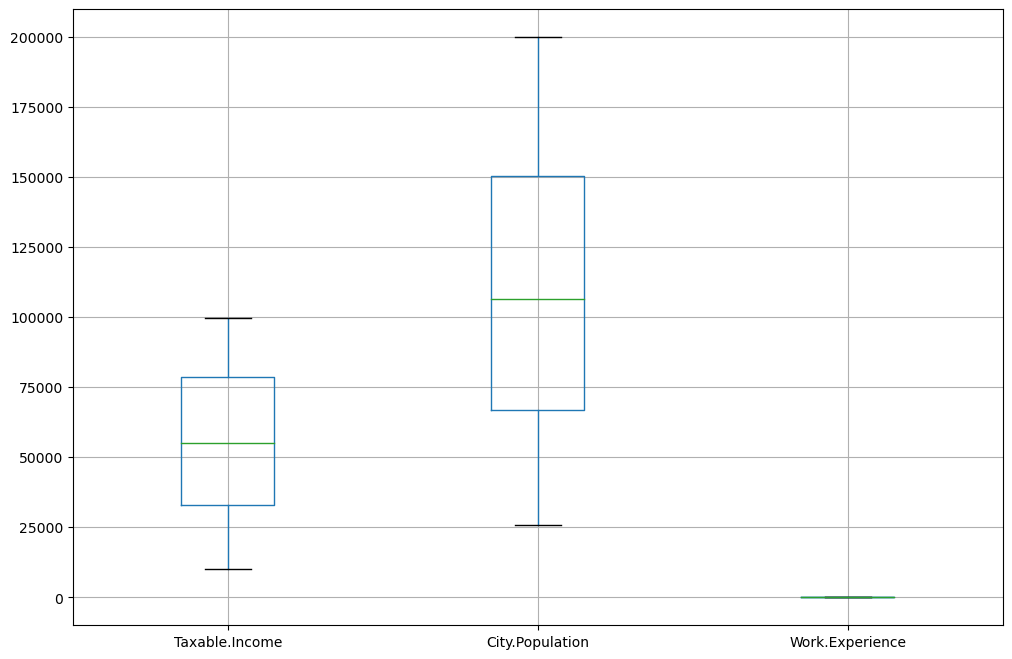

In [8]:
#plot boxplot to visualize distribution of all the numerical columnns at once..
plt.figure(figsize=(12,8))
pd.DataFrame(data=df).boxplot()

The distribution of segment City.population is widely distributed over all other segments.

Taxable income is lies between 15000 to 100000.It is the amount of how much tax an individual owes to the government.

## Encoding:Convert Categorical Data into Numbers Using One Hot Encoding

In [9]:
#Creating dummy vairables for Features ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [10]:
#Creating new cols Result and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["Result"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Result
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


### Lets assume: Taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [11]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["Result"],drop_first=True)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Result_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


# Defining Feature & Target

In [12]:
#Defining Feature/independant Variable
X=df.drop(['Taxable.Income','Result_Good'], axis=1)
print(X.shape)
X.head()

(600, 6)


,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [15]:
#Defining Target/Dependant Variable
Y=pd.DataFrame(df['Result_Good'])
print(Y.shape)
Y.head()

(600, 1)


,Result_Good
0,1
1,1
2,1
3,1
4,1


In [16]:
#Return a Series containing counts of unique rows in the DataFrame.
Y.value_counts()

Result_Good
1              476
0              124
dtype: int64

#### We conclude that 124 Person have taxable_income <= 30000, we consider all those are 'Risky' & Other 476 Person are 'Good'

## Check which Person are Risky By comparing with other segments

### 1.Undergrad_YES VS Result

In [17]:
pd.crosstab(df['Result_Good'],df['Undergrad_YES'])

Undergrad_YES,0,1
Result_Good,,
0,58,66
1,230,246


From above Crosstab we conclude that total 312 person are Undergraduate out of this 246 are considered Good & 66 are Risky.

Also conclude that 288 person are Graduste out of this 230 are considered as Good & 58 are Risky.

<AxesSubplot:xlabel='Result_Good'>

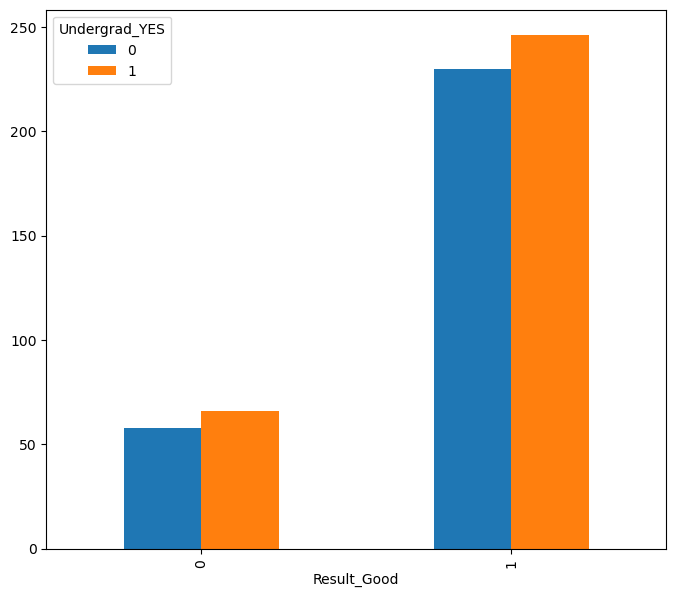

In [23]:
pd.crosstab(df['Result_Good'],df['Undergrad_YES']).plot(kind='bar',figsize=(8,7))

From above CountPlot we conclude that Mostly UnderGraduate Person are Risky.

### 2.Marital.Status VS Result

In [20]:
pd.crosstab(df['Result_Good'],df['Marital.Status_Married'])

Marital.Status_Married,0,1
Result_Good,,
0,79,45
1,327,149


From above Crosstab we conclude that total 194 person are married out of this 149 are considered Good & 45 are Risky.

Also conclude that 406 person are Unmarried out of this 327 are considered as Good & 79 are Risky.

<AxesSubplot:xlabel='Result_Good'>

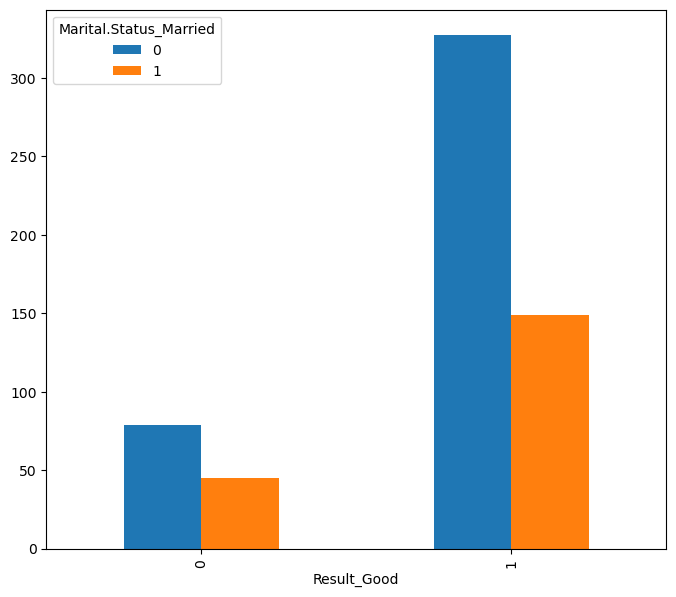

In [22]:
pd.crosstab(df['Result_Good'],df['Marital.Status_Married']).plot(kind='bar',figsize=(8,7))

From above CountPlot we conclude that Mostly Unmarried Person are Risky.

### 3.Urban VS Result

In [24]:
pd.crosstab(df['Result_Good'],df['Urban_YES'])

Urban_YES,0,1
Result_Good,,
0,61,63
1,237,239


From above Crosstab we conclude that total 302 person are belongs to Urban Area out of this 239 are considered Good & 63 are Risky.

Also conclude that 298 person are belongs to Rural Area out of this 237 are considered as Good & 61 are Risky.

<AxesSubplot:xlabel='Result_Good'>

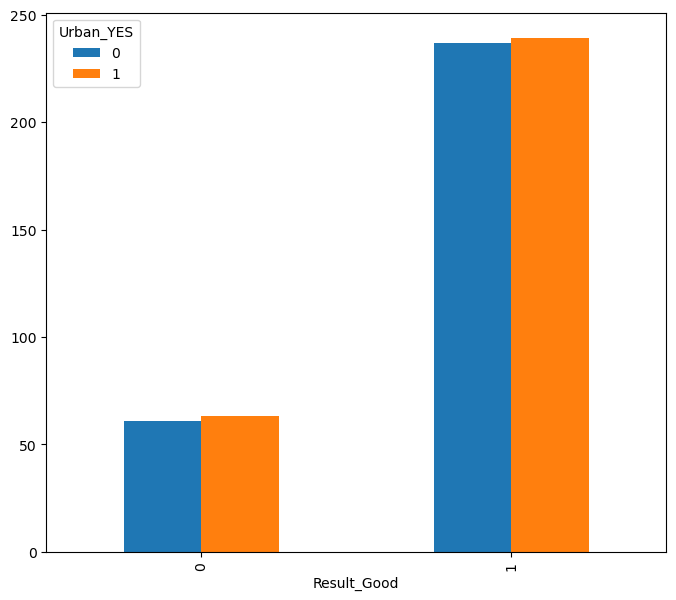

In [26]:
pd.crosstab(df['Result_Good'],df['Urban_YES']).plot(kind='bar',figsize=(8,7))

From above CountPlot we conclude that there is no much difference between Urban & Rural areas person but still countplot shows Urban areas Person are slightly risky than Rural Areas person.

In [27]:
#split data into Train & test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [28]:
X_train.shape

(420, 6)

In [29]:
Y_train.shape

(420, 1)

# Building Decision Tree Classifier using Entropy Criteria

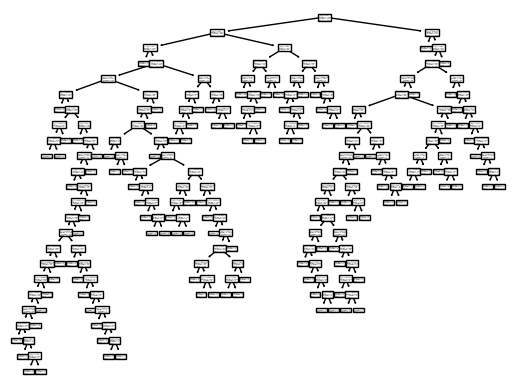

In [32]:
#set max_depth=none
dec_model=DecisionTreeClassifier(criterion='entropy',max_depth=None)
dec_model.fit(X_train,Y_train)
tree.plot_tree(dec_model)
plt.show()

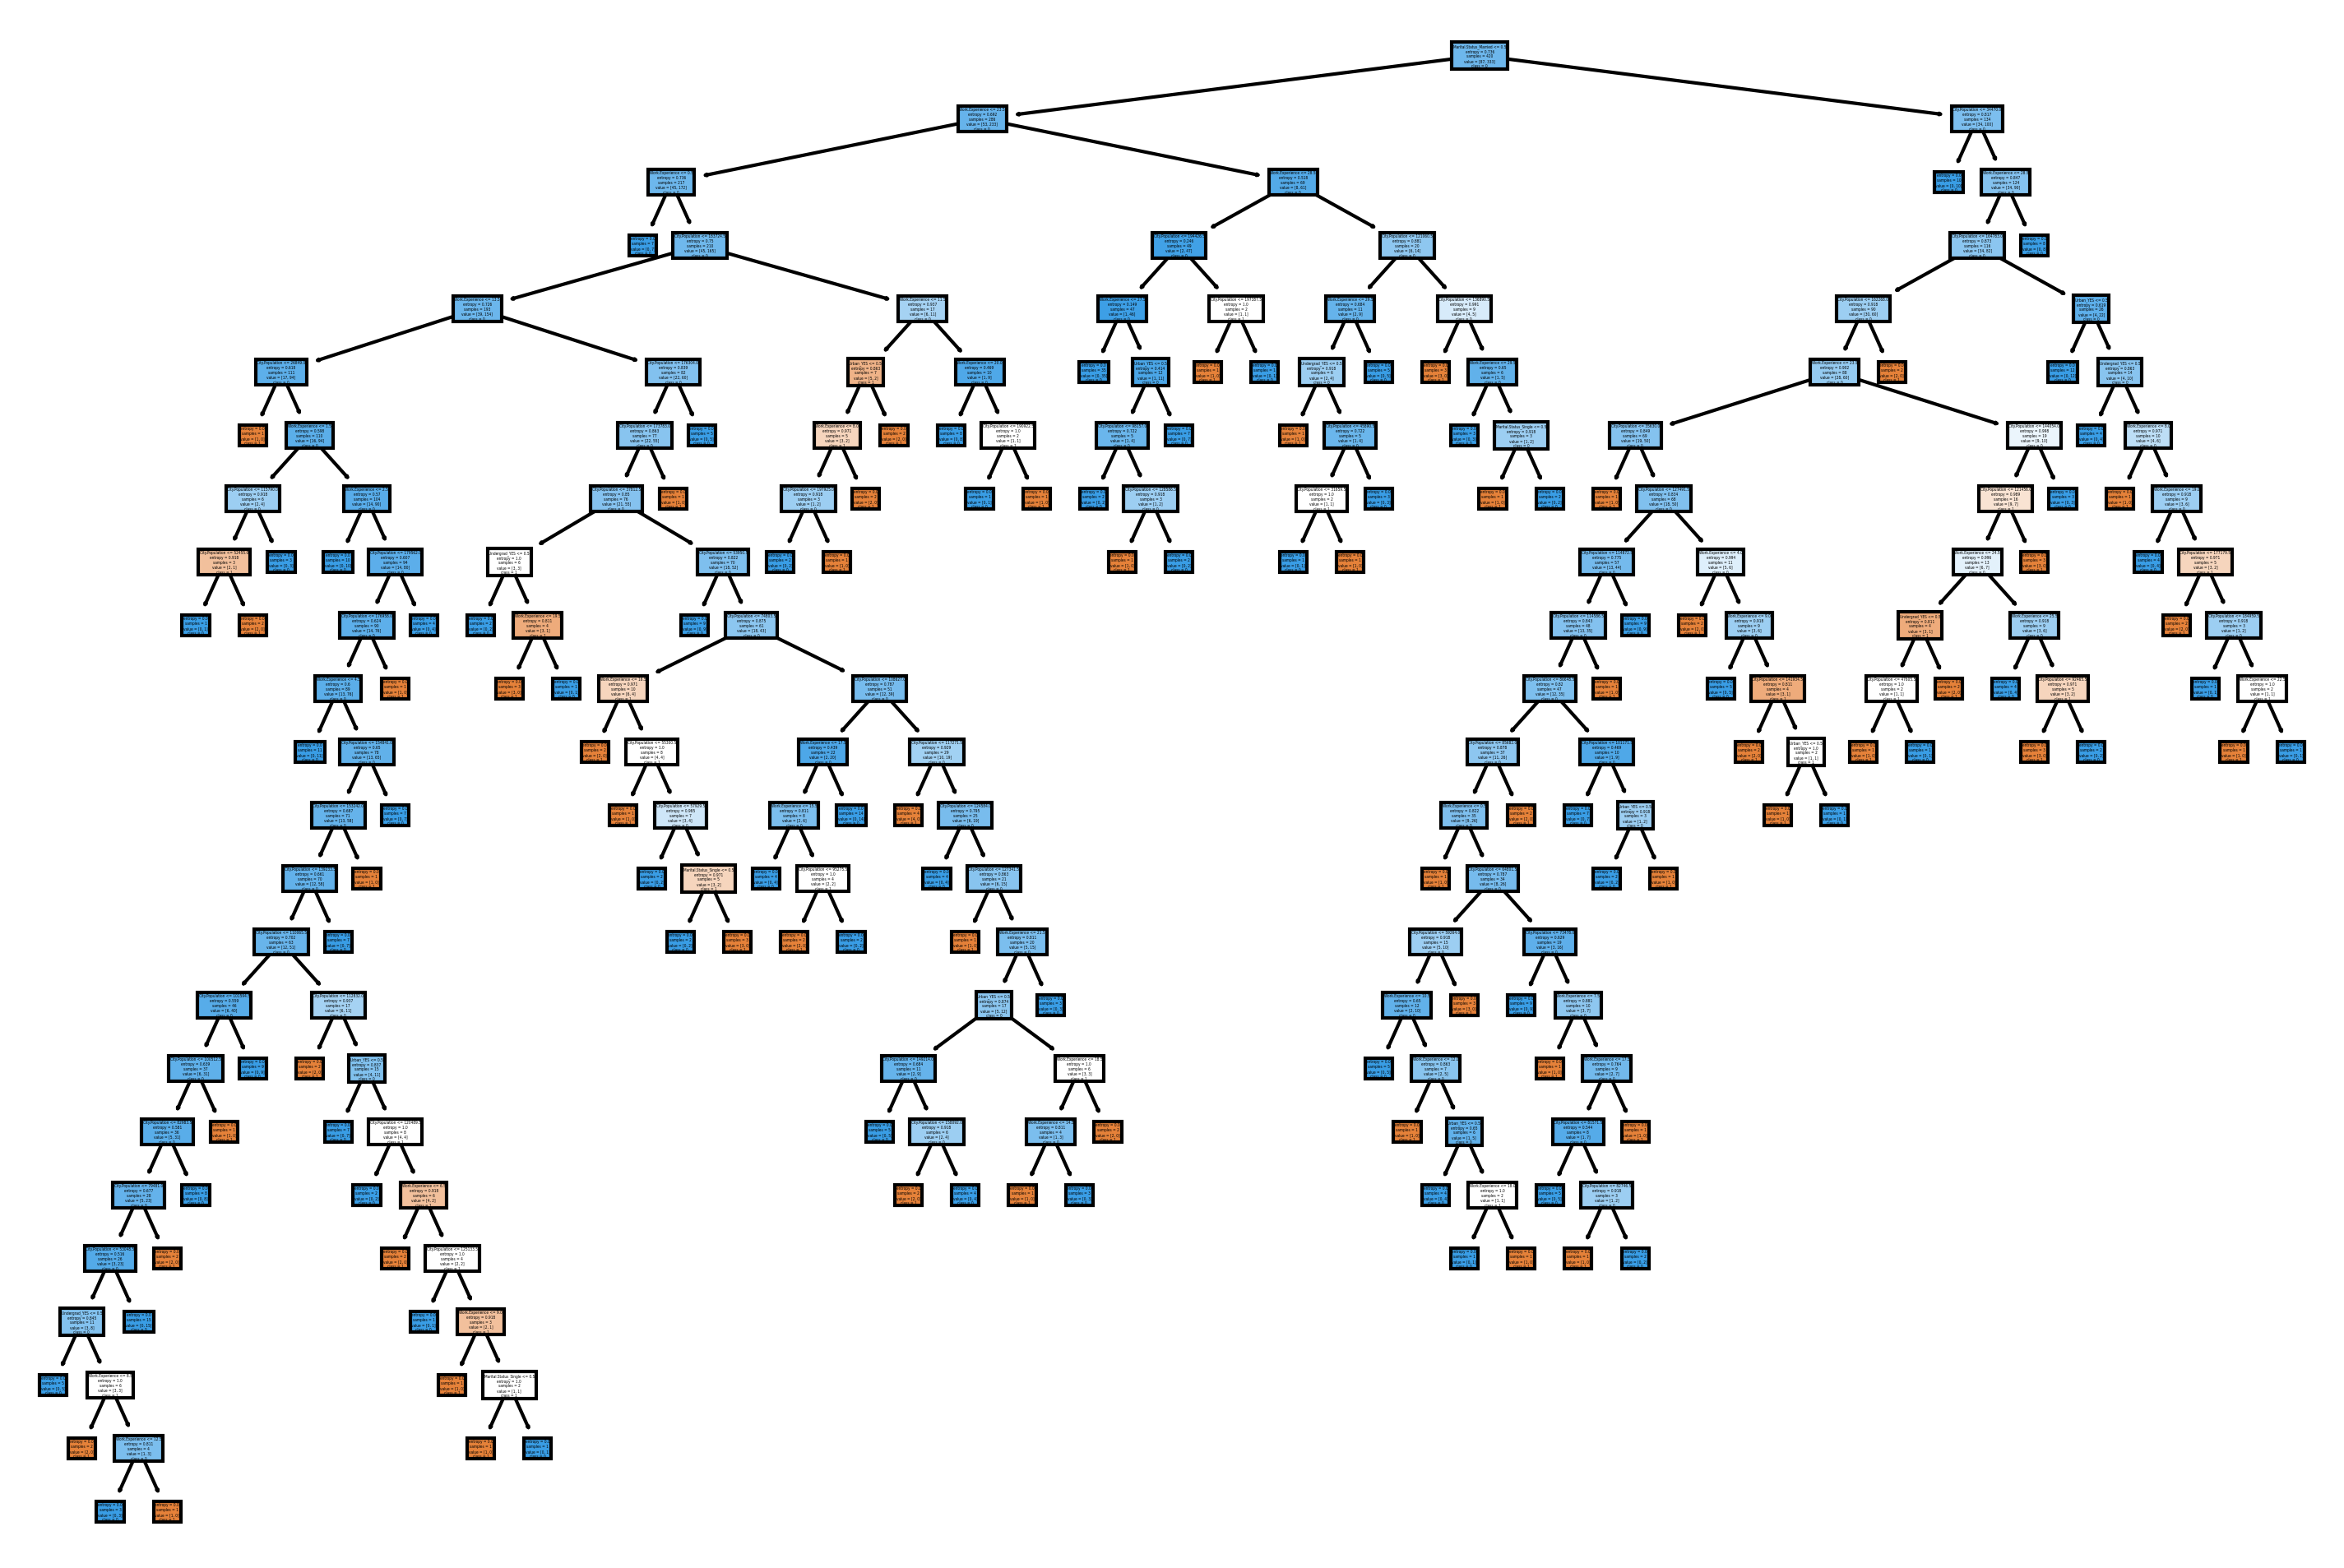

In [33]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES'] # give feature names
cn=['1','0'] # make list of category (class) names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,8), dpi=300) # increase size using plt.subplot
tree.plot_tree(dec_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [34]:
#Predicting on test data
preds = dec_model.predict(X_test) # predicting on test data set 
pd.Series.value_counts(preds) # getting the count of each category 

1    132
0     48
dtype: int64

In [35]:
preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1], dtype=uint8)

In [36]:
#check training accuracy
dec_model.score(X_train,Y_train) 

1.0

Decision tree depth is max so model is trained completely so it gives 100% accuracy.

But 100% accuracy means model is overfitted.....we need to Performing Pruning to overcome the problem of overfitting.

In [37]:
#check testing accuracy
dec_model.score(X_test,Y_test)

0.6166666666666667

Our model is performing well on training set but performing worst on testing data that means our model is overfitted and memorized.

Model should be generalized not memorized.To avoid overfitiing we need to Performing Pruning to overcome the problem of overfitting.

## Performing Pruning to overcome the problem of overfitting

### calculating for max_depth=3

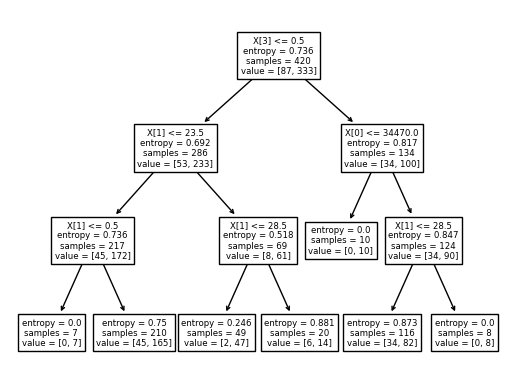

In [39]:
#set max_depth=3
dec_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dec_model.fit(X_train,Y_train)
tree.plot_tree(dec_model)
plt.show()

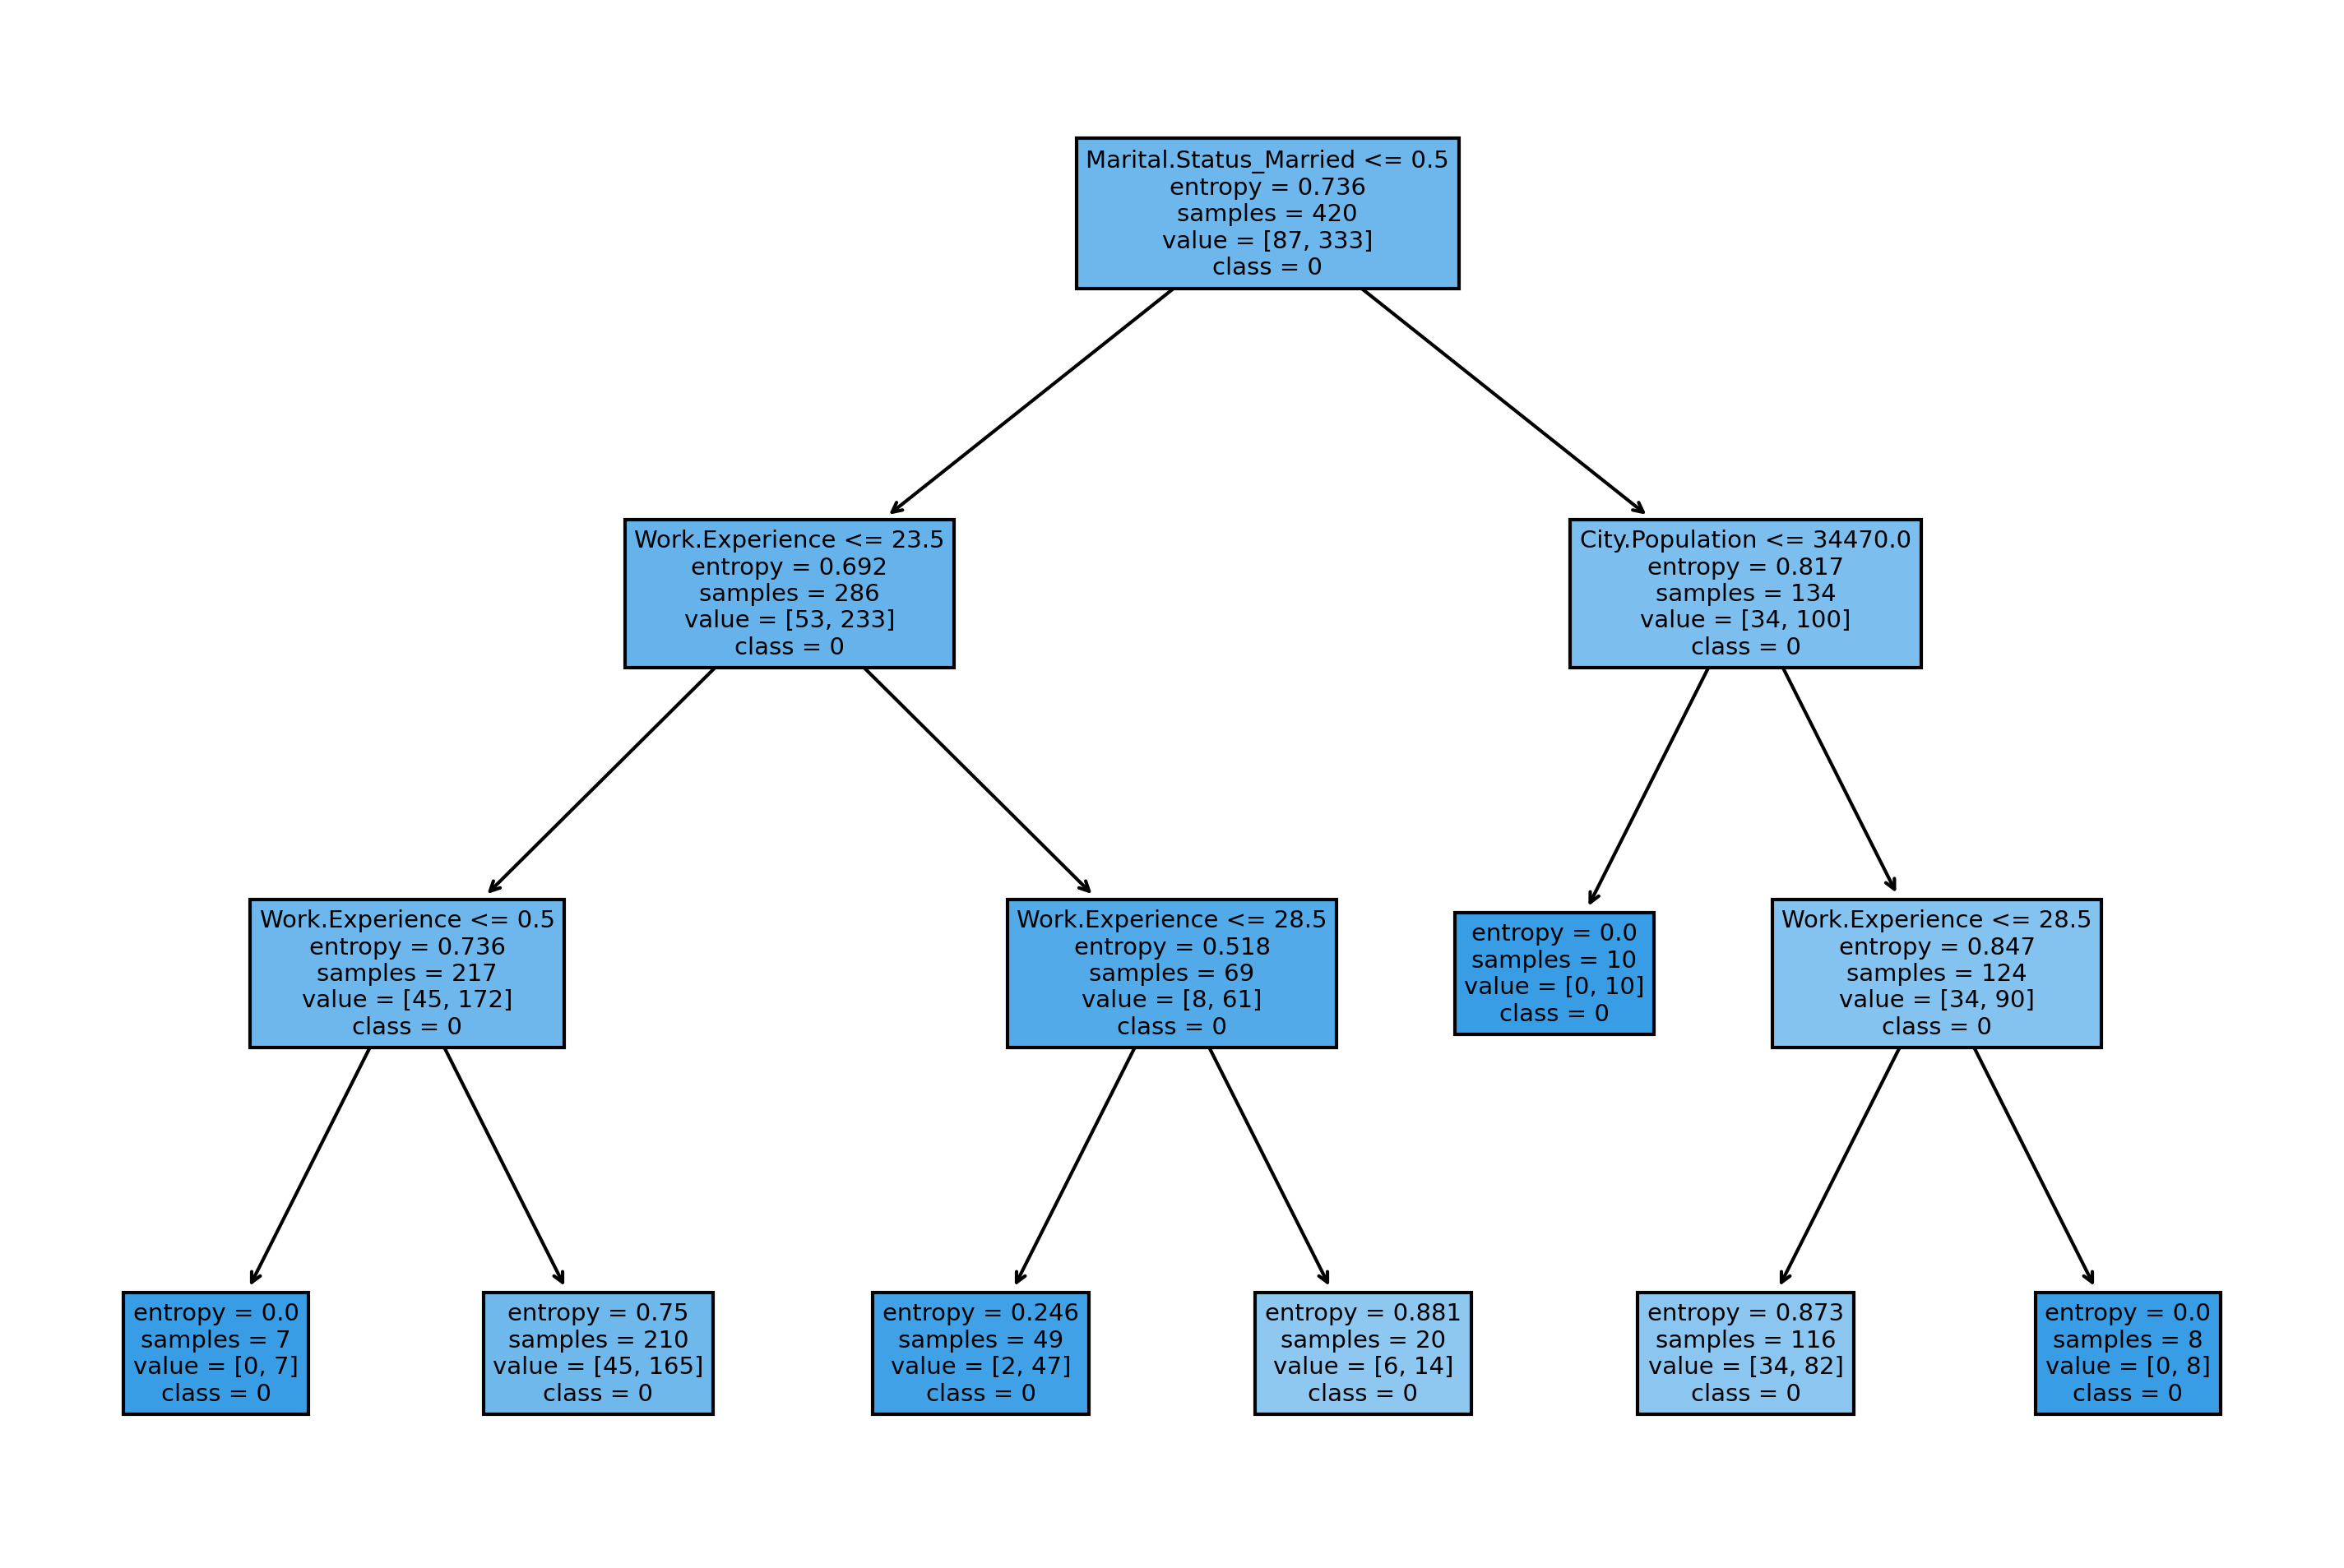

In [40]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']#give feature names
cn=['1','0'] # make list of category (class) names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,8), dpi=300) # increase size using plt.subplot
tree.plot_tree(dec_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [41]:
#check training accuracy
dec_model.score(X_train,Y_train) 

0.7928571428571428

By tree pruning we reduced our models training,to make model generalize & to give better accuracy on test data.

In [42]:
#check testining accuracy
dec_model.score(X_test,Y_test)

0.7944444444444444

Now our model give 79% accuracy on test data which is better than previous model.

# Building Decision Tree Classifier (CART) using Gini Criteria

In [44]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [45]:
# Check training accuracy
model_gini.score(X_train, Y_train) 

0.7928571428571428

In [46]:
#Check testing accuracy
model_gini.score(X_test, Y_test) 

0.7944444444444444

Using Gini Criterion we get 79% accuracy which is same as given by entropy criterion.